In [1]:
import pandas as pd
import numpy as np
#import yfinance as yf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#pd.__version__


In [2]:
df_header = pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\df_allInfo_clean.pkl')
df_ts=pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\50yr_timeSeries_data.pkl')

# df_header = pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\df_allInfo_clean.pkl')
# df_ts=pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\50yr_timeSeries_data.pkl')

In [3]:
df_ts.head()

TRGP                                  FDS                 ...  FE  \
           Open High Low Close Adj Close Volume Open High Low Close  ... Low   
Date                                                                 ...       
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   

                                  ODFL                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 3018 columns]

In [ ]:
# original - which is not nice, warnings have been suppressed

import warnings
warnings.filterwarnings(action='ignore')


In [5]:

df_close         = df_ts.loc[: ,(slice(None) ,['Close'])].copy()
df_close.columns = df_close.columns.droplevel(1)

df_close['month'] = df_close.index.month
df_close['year']  = df_close.index.year

df_close.head()    

,TRGP,FDS,SYY,RCL,PSA,FISV,HUM,SNA,EMR,CAT,...,ADP,WMB,CCL,ATVI,DLTR,DLR,FE,ODFL,month,year
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.661458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.687500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962


In [ ]:
import pickle
import os

# # create alternate_port.pickle (from selectTickers)
# pickle_out = open('alternate_port.pickle' ,'wb')
# pickle.dump(alternate_port ,pickle_out)
# pickle_out.close()

# import alternate_port.pickle
pickle_in = open(r'C:\Users\Safe\Documents\Data Science Course\_Project\alternate_port.pickle' ,'rb')
alternate_port = pickle.load(pickle_in)


In [ ]:
i = 5

df = df_close[alternate_port[f'cluster_{i}'].index.values.tolist()].copy()
df = df.dropna()
df.head()

In [ ]:
# Create Portfolio using stock weighting
# Question: How to determine the weighting of each stock in the portfolio?

dummy_weight = np.array([1/df.shape[1] for x in range(df.shape[1])])

ticker_weight = dummy_weight # STILL NEED TO DO WEIGHTINGS

df_port = pd.Series(df.values.dot(ticker_weight) ,index=df.index)
df_port

In [ ]:
#################################
# NOTHING HAS BEEN DONE TO ANY CODE FURTHER BELOW
#################################

In [ ]:
# from sklearn import preprocessing

# df_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df) ,columns=df.columns ,index=df.index)
# df_scaled

# # nba[nba.columns] = pd.DataFrame(scaler.transform(nba), index=nba.index)

In [6]:
#--- NO log transformation -- differnece compared to v4
df=df_close.copy()


In [7]:
# time series analysis
df_ts=df['BLK']
df_ts=df_ts.dropna()
df_ts.head()

Date
1999-10-01    14.125
1999-10-04    14.000
1999-10-05    14.125
1999-10-06    14.875
1999-10-07    14.125
Name: BLK, dtype: float64

In [8]:
df_ts.index


DatetimeIndex(['1999-10-01', '1999-10-04', '1999-10-05', '1999-10-06',
               '1999-10-07', '1999-10-08', '1999-10-11', '1999-10-12',
               '1999-10-13', '1999-10-14',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09'],
              dtype='datetime64[ns]', name='Date', length=5837, freq=None)

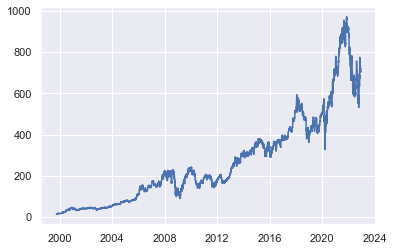

In [9]:
plt.plot(df_ts);

In [10]:
# based on monthly data

df_ts_monthly=df_ts.resample('1M').mean()
df_ts_monthly.head()

Date
1999-10-31    13.892857
1999-11-30    16.943452
1999-12-31    17.633523
2000-01-31    16.971875
2000-02-29    18.612500
Freq: M, Name: BLK, dtype: float64

In [11]:
# v 006
pred_period = 12+12+12 # const for predition months

print(df_ts_monthly.shape)
df_ts_monthly_save=df_ts_monthly.copy() # needed to compare forecast with realized yield
df_ts_monthly = df_ts_monthly.head(279-34) # till 2020.02.29, i.e. exclide covid drop and increase


(279,)


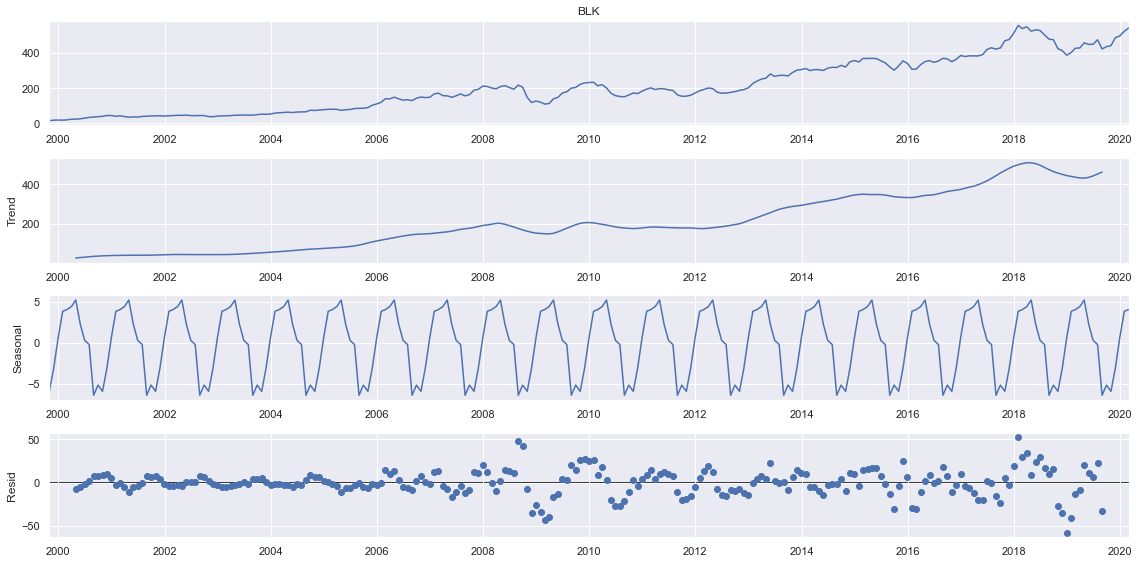

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsa =seasonal_decompose(df_ts_monthly)
fig=tsa.plot()
fig.set_size_inches((16, 8))
fig.tight_layout()

plt.show();

p-value: 0.31342112168450875


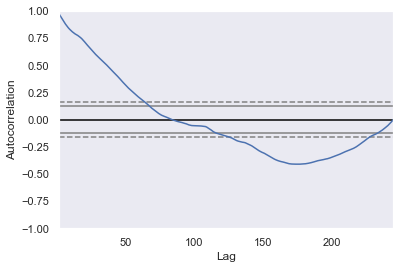

In [13]:
import statsmodels.api as sm

df_ts_monthly_log = np.log(df_ts_monthly) #Log transform


pd.plotting.autocorrelation_plot(df_ts_monthly_log);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log)
print ("p-value:",res[1])

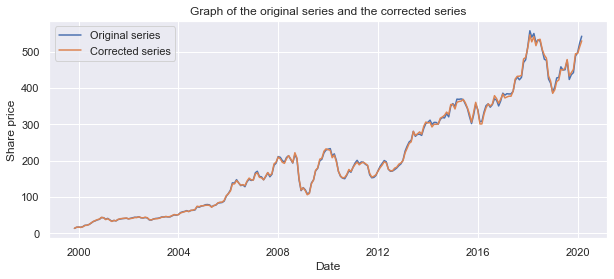

In [14]:
# v006 basic decomp

#plt.plot(df_ts_monthly_log);
tsa =seasonal_decompose(df_ts_monthly_log)

cvs=df_ts_monthly_log- tsa.seasonal

# We go to the exponential to find the original series
x_cvs=np.exp(cvs)

# We display the series
plt.figure(figsize= (10,4))

plt.plot(df_ts_monthly, label='Original series')
plt.plot(x_cvs, label='Corrected series') 

plt.title('Graph of the original series and the corrected series')
plt.xlabel('Date')
plt.ylabel('Share price')
plt.legend();

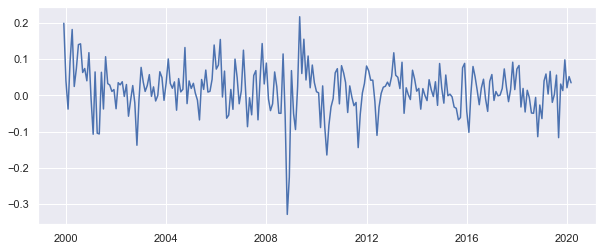

p-value: 1.209829459118172e-10


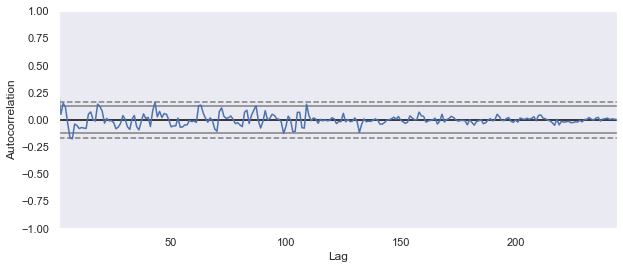

In [15]:
df_ts_monthly_log_1 = df_ts_monthly_log.diff().dropna()

plt.figure(figsize= (10,4))
plt.plot(df_ts_monthly_log_1);
plt.show();

plt.figure(figsize= (10,4))
pd.plotting.autocorrelation_plot(df_ts_monthly_log_1);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log_1)
print ("p-value:",res[1])


In [ ]:
######################## sarima

C:\Users\Zoli\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


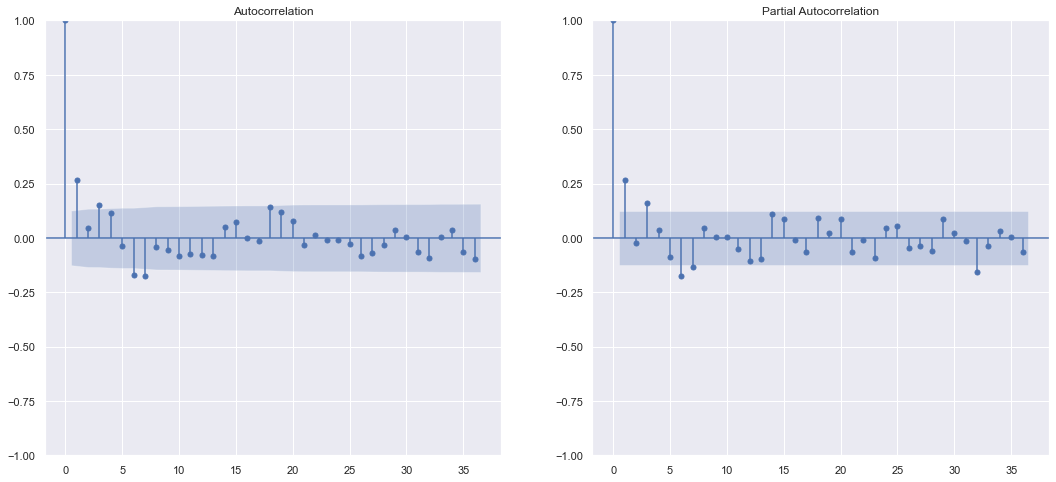

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

plot_acf(df_ts_monthly_log_1,lags=36,ax=ax1)
plot_pacf(df_ts_monthly_log_1,lags=36,ax=ax2)

plt.show();


In [17]:
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(1,1,1), seasonal_order = (0,1,1,12)) 
# df_ts_monthly_log is used , not diff !!!
# why we need D=1, since no second order diff.

model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

C:\Users\Zoli\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                BLK   No. Observations:                  245
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 292.055
Date:                            Mon, 27 Feb 2023   AIC                           -576.111
Time:                                    21:25:46   BIC                           -562.324
Sample:                                10-31-1999   HQIC                          -570.550
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0773      0.166     -0.465      0.642      -0.403       0.249
ma.L1          0.3775      0.157      2.399      0.016       0.069       0.686
ma.S.L12      -0.9865      0.450     -2.191      0.028      -1.869      -0.104
sigma2         0.0041      0.002      2.242      0.025       0.001       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                26.71
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.40
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# ar.L1 is not significant, so removed
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(0,1,1), seasonal_order = (0,1,1,12)) # df_ts_monthly_log is used , not diff !!!
model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                BLK   No. Observations:                  245
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 291.984
Date:                            Mon, 27 Feb 2023   AIC                           -577.968
Time:                                    21:25:48   BIC                           -567.628
Sample:                                10-31-1999   HQIC                          -573.798
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3041      0.054      5.665      0.000       0.199       0.409
ma.S.L12      -0.9831      0.357     -2.757      0.006      -1.682      -0.284
sigma2         0.0041      0.001      2.822      0.005       0.001       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                27.54
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.41
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Ljung Box test is ok, but Jarque-Bera is not! -- TODO

(245,)


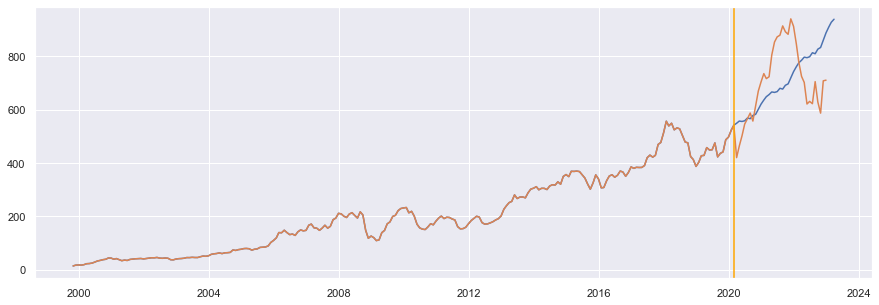

In [19]:
import datetime as dt

print(df_ts_monthly.shape)
prediction_log = model_sm_fitted.predict(245, 245+pred_period)
prediction=np.exp(prediction_log)

df_ts_monthly_pred=pd.concat([df_ts_monthly,prediction])

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_ts_monthly_pred)
plt.plot(df_ts_monthly_save) # v 006

plt.axvline(x= dt.date(2020,3,1), color='orange'); 

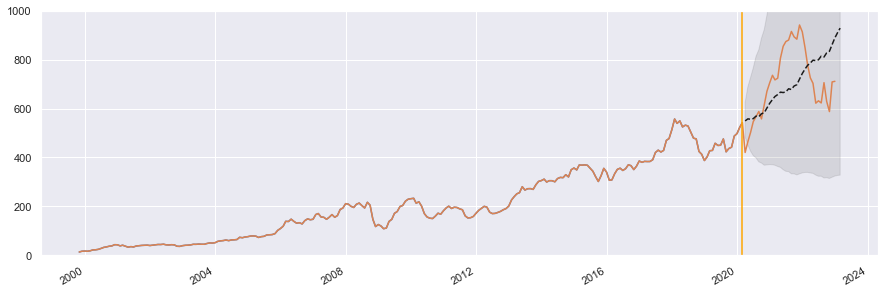

In [20]:
prediction_log = model_sm_fitted.get_forecast(steps =pred_period).summary_frame()  #PForecasting with a confidence interval
prediction=np.exp(prediction_log)

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly)
plt.plot(df_ts_monthly_save) # v 006
plt.ylim(0,1000) # v006

prediction['mean'].plot(ax = ax, style = 'k--') # Plotting the mean

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Plotting the confidence interval

plt.axvline(x= dt.date(2020,3,1), color='orange'); 

In [21]:
validation_data=df_ts_monthly_save.tail(pred_period) # we know that 3y prediction

rmse_sm = np.sqrt(np.square(np.subtract(validation_data,prediction['mean'])).mean()) 
print("RMSE of SARIMA prediction is:", rmse_sm)

RMSE of SARIMA prediction is: 142.21420551797124


In [ ]:
###################### linear regression 

In [22]:
from sklearn.linear_model import LinearRegression

df_ts_monthly_lin=pd.DataFrame(df_ts_monthly,index=df_ts_monthly.index)
df_ts_monthly_lin['Time'] = np.arange(len(df_ts_monthly_lin.index))
X=df_ts_monthly_lin.loc[:, ['Time']] 
y=df_ts_monthly_lin.loc[:, ['BLK']] 

In [23]:
model_lin = LinearRegression()
model_lin.fit(X, y)



LinearRegression()

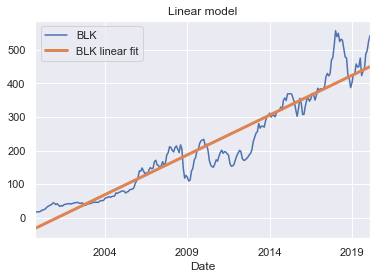

In [24]:
y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK linear fit'])

ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3,legend="linear projection")
ax.set_title('Linear model');

In [25]:
df_ts_monthly_lin['Lag_1'] = df_ts_monthly_lin['BLK'].shift(1)
df_ts_monthly_lin.head()

,BLK,Time,Lag_1
Date,,,
1999-10-31,13.892857,0,NaN
1999-11-30,16.943452,1,13.892857
1999-12-31,17.633523,2,16.943452
2000-01-31,16.971875,3,17.633523
2000-02-29,18.612500,4,16.971875


In [26]:
X = df_ts_monthly_lin.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df_ts_monthly_lin.loc[:, 'BLK']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model_lin = LinearRegression()
model_lin.fit(X, y)

y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK lag'] )
y_pred

,BLK lag
Date,
1999-11-30,15.546855
1999-12-31,18.605499
2000-01-31,19.297390
2000-02-29,18.633996
2000-03-31,20.278950
...,...
2019-10-31,439.140644
2019-11-30,444.809649
2019-12-31,490.300766


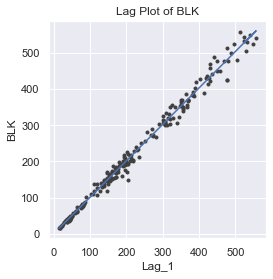

In [27]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred['BLK lag'])

ax.set_aspect('equal')
ax.set_ylabel('BLK')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of BLK');


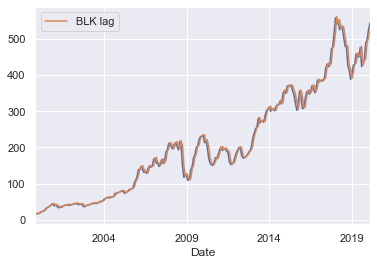

In [28]:
# check of fit

ax = y.plot()
ax = y_pred.plot(ax=ax)

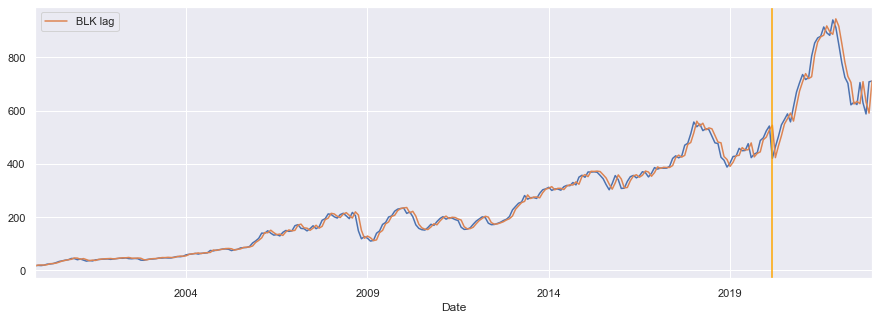

In [29]:
# future prediction based on save
df_ts_monthly_lin_save = pd.DataFrame(df_ts_monthly_save, index=df_ts_monthly_save.index)
df_ts_monthly_lin_save['Time'] = np.arange(len(df_ts_monthly_lin_save.index))

X_save = df_ts_monthly_lin_save.loc[:, ['Time']] 
df_ts_monthly_lin_save['Lag_1'] = df_ts_monthly_lin_save['BLK'].shift(1)

X_save = df_ts_monthly_lin_save.loc[:, ['Lag_1']]
X_save.dropna(inplace=True)  
y_save = df_ts_monthly_lin_save.loc[:, 'BLK']  
y_save, X_save = y_save.align(X_save, join='inner') 

# same as before without model fit!
y_pred_save = pd.DataFrame(model_lin.predict(X_save), index=X_save.index, columns=['BLK lag'] )


fig, ax = plt.subplots(figsize = (15,5))

ax = y_save.plot()
ax = y_pred_save.plot(ax=ax)
plt.axvline(x= dt.date(2020,3,1), color='orange'); 

In [30]:
df_ts_monthly_lin_save.tail()

,BLK,Time,Lag_1
Date,,,
2022-08-31,705.572170,274,622.710501
2022-09-30,629.067618,275,705.572170
2022-10-31,587.409046,276,629.067618
2022-11-30,708.590957,277,587.409046
2022-12-31,711.108564,278,708.590957


In [ ]:
############### Prophet

In [31]:
import prophet as pt

In [32]:
df_ts_monthly_lin.head()

,BLK,Time,Lag_1
Date,,,
1999-10-31,13.892857,0,NaN
1999-11-30,16.943452,1,13.892857
1999-12-31,17.633523,2,16.943452
2000-01-31,16.971875,3,17.633523
2000-02-29,18.612500,4,16.971875


In [33]:
df_ts_monthly_pt=df_ts_monthly_lin.rename(columns={'BLK': 'y'})
df_ts_monthly_pt['ds']=df_ts_monthly_pt.index
df_ts_monthly_pt=df_ts_monthly_pt.drop({'Lag_1','Time'},axis=1)
df_ts_monthly_pt.head()

,y,ds
Date,,
1999-10-31,13.892857,1999-10-31
1999-11-30,16.943452,1999-11-30
1999-12-31,17.633523,1999-12-31
2000-01-31,16.971875,2000-01-31
2000-02-29,18.612500,2000-02-29


In [34]:
model_pt = pt.Prophet(interval_width=0.95)
model_pt.fit(df_ts_monthly_pt)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Zoli\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [35]:
future_dates = model_pt.make_future_dataframe(periods=pred_period-2, freq='MS') # why we need 2?
future_dates.tail()

,ds
274,2022-08-01
275,2022-09-01
276,2022-10-01
277,2022-11-01
278,2022-12-01


In [36]:
forecast = model_pt.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

C:\Users\Zoli\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoli\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1999-10-31,-1.206028,-68.995880,60.180560
1,1999-11-30,7.109773,-55.986620,68.674891
2,1999-12-31,8.276018,-53.064732,80.025267
3,2000-01-31,9.866377,-54.758209,73.458116
4,2000-02-29,14.161079,-48.902155,77.990141


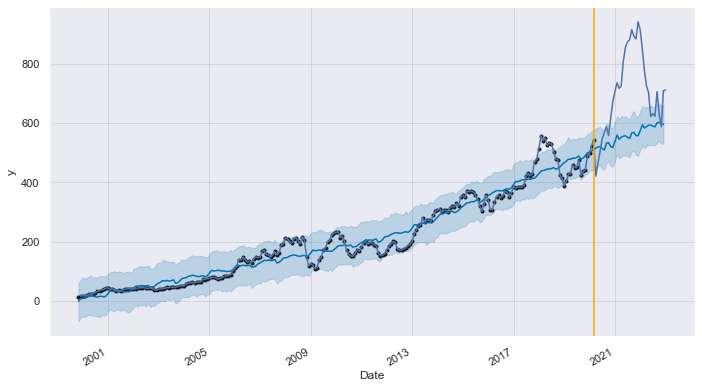

In [37]:
model_pt.plot(forecast, uncertainty=True)

ax = y_save.plot()
plt.axvline(x= dt.date(2020,3,1), color='orange'); 

C:\Users\Zoli\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


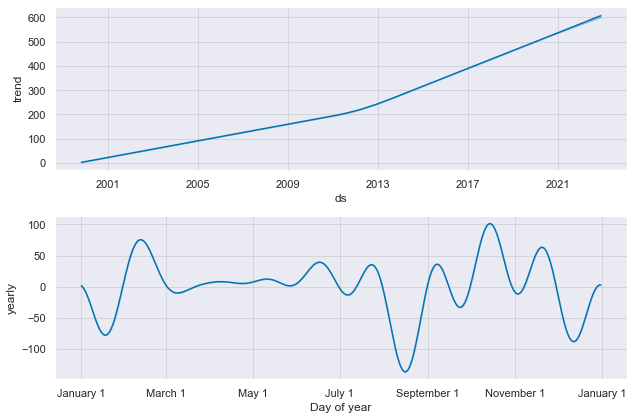

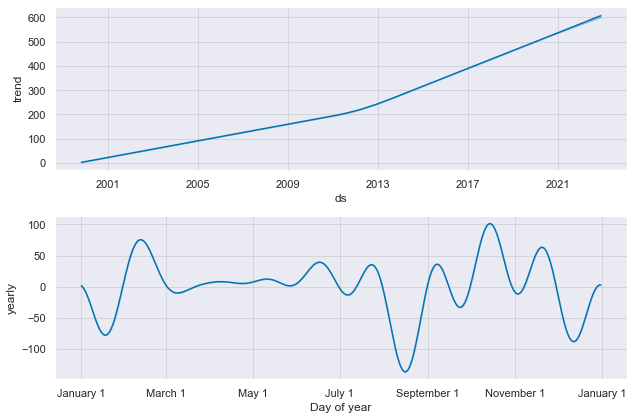

In [38]:
model_pt.plot_components(forecast)


In [ ]:
rmse_pt = np.sqrt(np.square(np.subtract(validation_data,forecast.trend.tail(36))).mean()) 
print("RMSE of Prophet prediction is:", rmse_pt)
# TODO, indices are different